In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data/train.csv')


<h2>Numerical Features</h2>

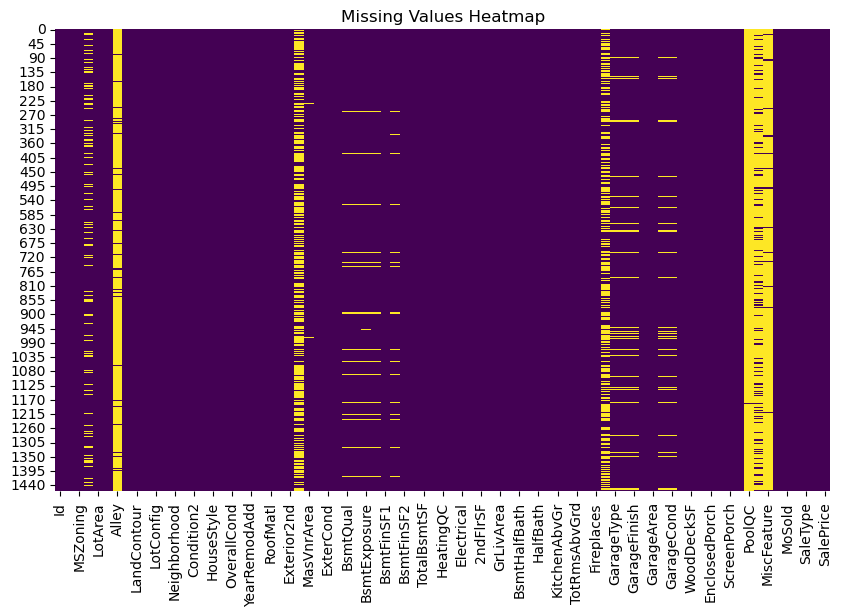

In [3]:


plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

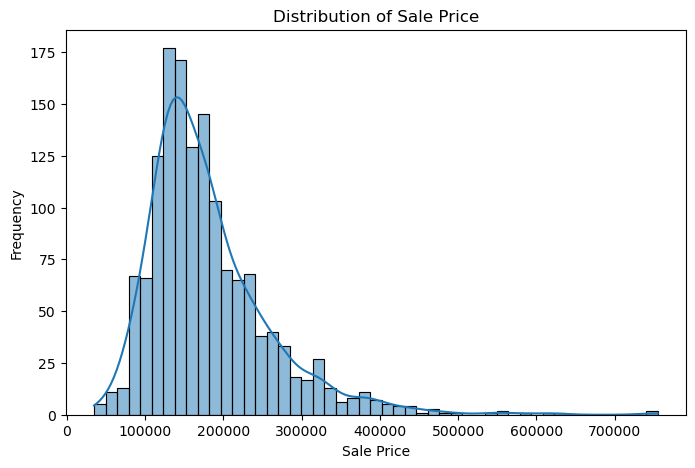

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(data['SalePrice'], kde=True)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

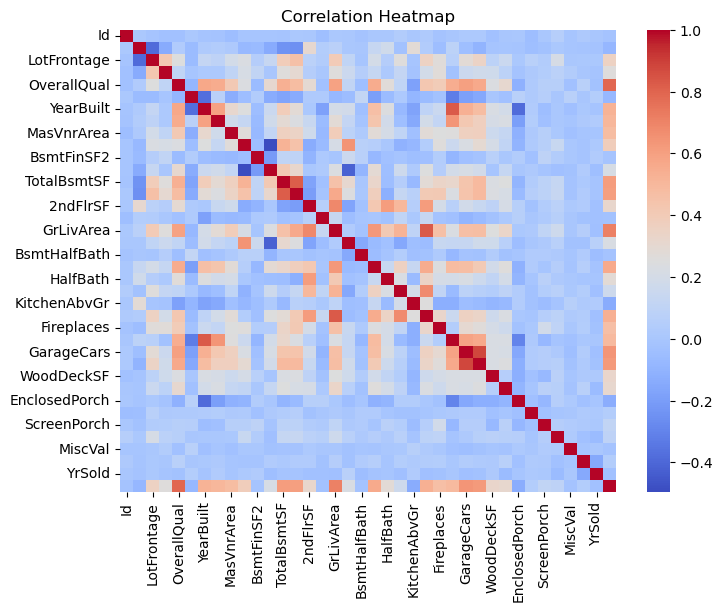

In [5]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)
print("\nTop 10 Features Correlated with Sale Price:")
print(top_corr)



Top 10 Features Correlated with Sale Price:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


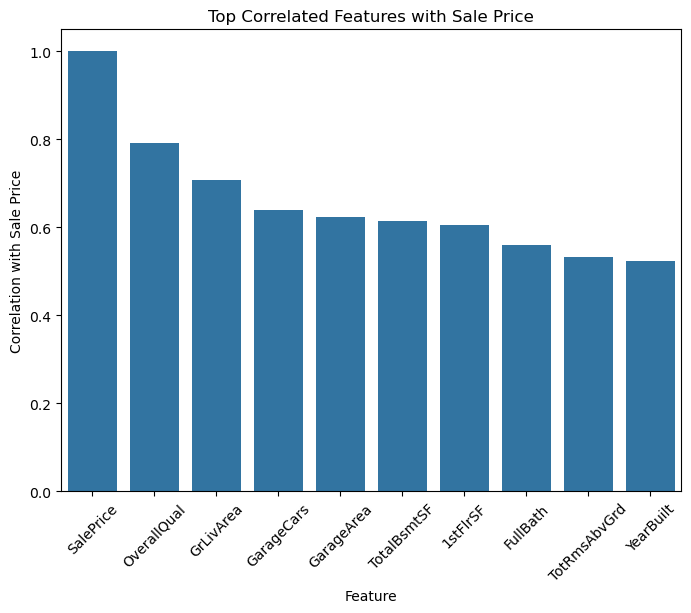

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.index, y=top_corr.values)
plt.title("Top Correlated Features with Sale Price")
plt.xlabel("Feature")
plt.ylabel("Correlation with Sale Price")
plt.xticks(rotation=45)
plt.show()

In [8]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns and Unique Values:")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")


Categorical Columns and Unique Values:
MSZoning: 5 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 3 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 5 unique values
GarageType: 6 unique values
GarageFinish: 3 unique 

<h2>Categorical Features</h2>

In [9]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
#Unique values for each category
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

In [ ]:
# Summarize SalePrice by each category in categorical columns
for col in categorical_cols:
    grouped = data.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    print(f"\n{col}:\n")
    print(grouped)

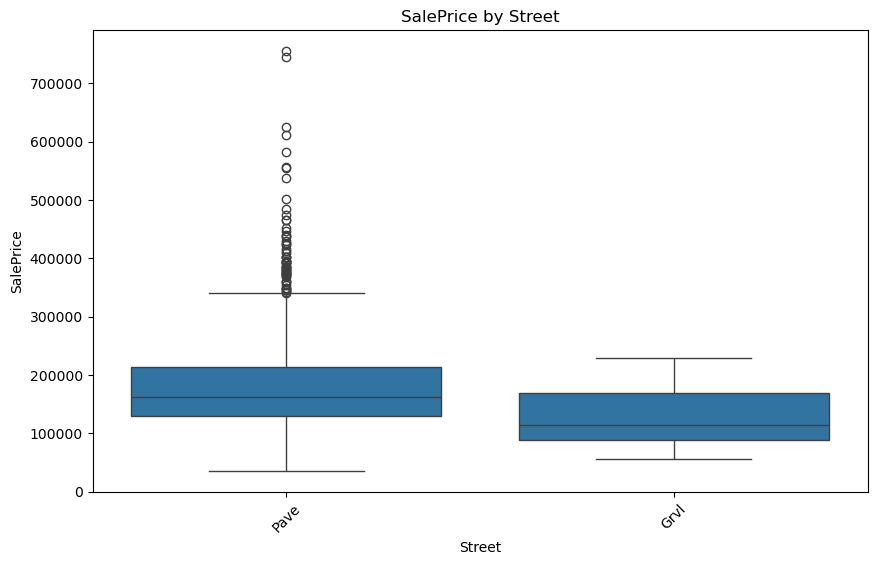

In [10]:
# Plot SalePrice distribution for specific categories (change x for category name)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Street', y='SalePrice', data=data)
plt.xticks(rotation=45)
plt.title(f"SalePrice by Street")
plt.show()


In [11]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Compute correlations with SalePrice
correlations = data_encoded.corr()['SalePrice'].sort_values(ascending=False)

# Display top positively and negatively correlated features
print("Top Correlated Features with SalePrice:\n")
print(correlations.head(10))  # Most positively correlated
print("\nMost Negatively Correlated Features with SalePrice:\n")
print(correlations.tail(10))  # Most negatively correlated


Top Correlated Features with SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Most Negatively Correlated Features with SalePrice:

BsmtExposure_No     -0.263600
LotShape_Reg        -0.267672
MSZoning_RM         -0.288065
HeatingQC_TA        -0.312677
Foundation_CBlock   -0.343263
GarageType_Detchd   -0.354141
GarageFinish_Unf    -0.410608
BsmtQual_TA         -0.452394
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, dtype: float64
